<a href="https://colab.research.google.com/github/hodades/Application-Machine-Learning/blob/main/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

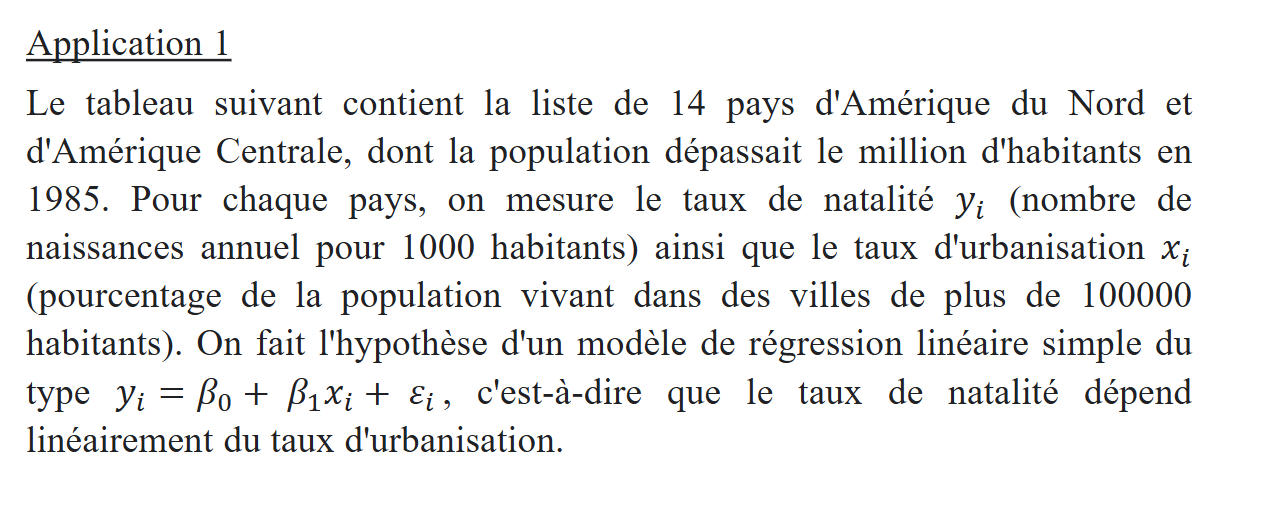

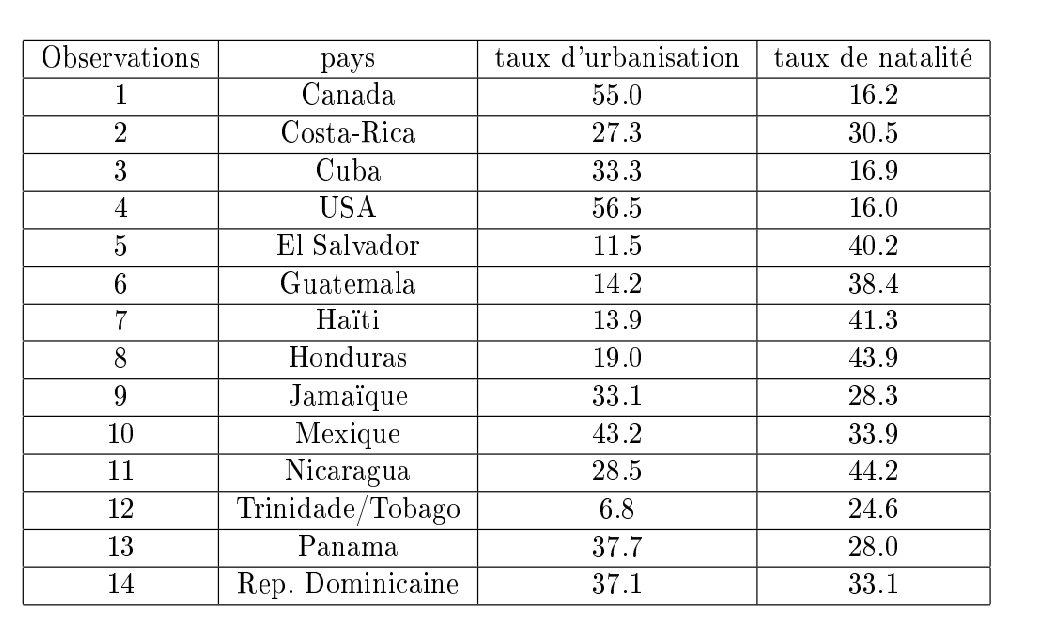

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('TD1-fichier.csv', sep = ',',index_col = 0)
data.head()

,Pays,Taux d'urbanisation,Taux de natalilté
Observations,,,
1,Canada,55.0,16.2
2,Costa-Rica,27.3,30.5
3,Cuba,33.3,16.9
4,USA,56.5,16.0
5,El Salvador,11.5,40.2


In [ ]:
#1-Déterminez les variables numériques et stockez-les dans un tableau num_data
num_data = data.select_dtypes(include=['int64','float64'])
print(num_data)

              Taux d'urbanisation  Taux de natalilté
Observations                                        
1                            55.0               16.2
2                            27.3               30.5
3                            33.3               16.9
4                            56.5               16.0
5                            11.5               40.2
6                            14.2               38.4
7                            13.9               41.3
8                            19.0               43.9
9                            31.1               28.3
10                           43.2               33.9
11                           28.5               44.2
12                            6.8               24.6
13                           37.7               28.0
14                           37.1               33.1


In [ ]:
#Calculez la moyenne de chaque variable contenue dans num_data
#et stockez-les dans une statistique DataFrame avec la moyenne comme seule colonne
stats = pd.DataFrame(num_data.mean(),columns = ['mean'])
stats

,mean
Taux d'urbanisation,29.650000
Taux de natalilté,31.107143


In [ ]:
#Comparez la moyenne du taux d’urbanisation avec la moyenne des taux de natalité. Que trouvez-vous?
#Ces deux moyennes sont à peu près égales, on peut prendre l'hypothèse que ces deux variables présente une homogenity dans l'intervale
#MAis ce n'est  pas suffisant pour cette determination, pour cette raison il faut calculer la médiane et les quantiles

In [ ]:
#Calculez la médiane de chaque variable contenue dans num_data et ajoutez une colonne médiane à stats
stats['median'] = num_data.median()

In [ ]:
stats

,mean,median
Taux d'urbanisation,29.650000,29.8
Taux de natalilté,31.107143,31.8


In [ ]:
#On peut conclure que pour le taux d'urbanisation 50% de notre échantillon présentent un taux inférieur de 29.8
#Aussi bien 50% de notre échantillon présentent un taux de natalité inférieur/supérieur à 31.8
#La difference entre la moyenne et la médiane n'est pas énorme et alors on peut toujours coclure l'hypothèse que ces deux variables
#présentent une homogenity des valeurs dans des intervales comparable.

In [ ]:
#Créez une variable mean_med_diff correspondant à la valeur absolue de la différence entre la moyenne et la médiane
stats['mean_med_diff']=abs(stats['mean'] - stats['median'])
stats

,mean,median,mean_med_diff
Taux d'urbanisation,29.650000,29.8,0.150000
Taux de natalilté,31.107143,31.8,0.692857


In [ ]:
num_data.quantile(q=[0.25, 0.5,0.75])

,Taux d'urbanisation,Taux de natalilté
0.25,15.40,25.45
0.50,29.80,31.80
0.75,37.55,39.75


In [ ]:
stats[['q1' , 'q2' , 'q3']] = num_data.quantile(q=[0.25 , 0.5 , 0.75]).transpose()
stats

,mean,median,q1,q2,q3
Taux d'urbanisation,29.650000,29.8,15.40,29.8,37.55
Taux de natalilté,31.107143,31.8,25.45,31.8,39.75


In [ ]:
#Si on compare les valeurs des quantiles et alors q1 avec q2 et q2 avec q3, on se rend compte que l'écart entre ces valeurs n'est pas énorme
#et ils sont de même grandeur. Même en comparant le troisième quantile à la moyenne, on est toujours dans la même zone de vaeurs
#Cela confirme notre hypohèse de base que les point sont disperser dans des intervales comparables
#et la dispersion des points est homogène

In [ ]:
#Ajoutez au tableau stats 3 colonnes min,max et min_max_diff donnant le min, max et la différence entre les deux
stats['min'] = num_data.min()
stats['max'] = num_data.max()
stats['min_max_diff'] = abs(stats['min'] - stats['max'])
stats

,mean,median,q1,q2,q3,min,max,min_max_diff
Taux d'urbanisation,29.650000,29.8,15.40,29.8,37.55,6.8,56.5,49.7
Taux de natalilté,31.107143,31.8,25.45,31.8,39.75,16.0,44.2,28.2


In [ ]:
#On remarque que la difference entre le min et le max n'est pas significative en terme d'intervale et de valeurs dans tous l'ensemble des reel
#On confirme notre hypothèse de base que les deux varibales variesnt dans des intervales comparables
#et que la dispersion des valeurs est homogène

In [ ]:
#Calculez l'écart type du taux d’urbanisation
#Afficher la moyenne +/- la plage d'écart type du taux d’urbanisation

Std_TD = data_num["Taux d'urbanisation"].std()
Moyen_TD = data_num["Taux d'urbanisation"].mean()
Interval = [Moyen_TD - Std_TD , Moyen_TD + Std_TD]
Interval

[14.104891939411146, 45.19510806058886]

In [ ]:
#Ajouter une nouvelle colonne intitulée Urbanisation_in à num_data contenant les valeurs des taux d’urbanisation qui appartiennent à la plage précédemment calculée
num_data['Urbanisation_in'] = num_data["Taux d'urbanisation"].between(Interval[0], Interval[1]).astype(int)
num_data

,Taux d'urbanisation,Taux de natalilté,Urbanisation_in
Observations,,,
1,55.0,16.2,0
2,27.3,30.5,1
3,33.3,16.9,1
4,56.5,16.0,0
5,11.5,40.2,0
6,14.2,38.4,1
7,13.9,41.3,0
8,19.0,43.9,1
9,31.1,28.3,1


In [ ]:
#Compter combien de taux d'urbanisation appartiennet à cette interval
#Interpréter
print(num_data['Urbanisation_in'].value_counts())

1    9
0    5
Name: Urbanisation_in, dtype: int64


In [ ]:
print(num_data['Urbanisation_in'].value_counts(normalize = True))

1    0.642857
0    0.357143
Name: Urbanisation_in, dtype: float64


In [ ]:
#On remarque que 64% des pays présentent un taux d'urbanisation qui appartient à l'interval selectionner
#et alors 35.7% n'appartient pas

In [ ]:
#Affichez les lignes num_data qui ont une valeur de 0 pour Urbanisation_in et stockez-les dans un DataFrame outliers
outliers = num_data[num_data['Urbanisation_in'] == 0]
outliers

,Taux d'urbanisation,Taux de natalilté,Urbanisation_in
Observations,,,
1,55.0,16.2,0
4,56.5,16.0,0
5,11.5,40.2,0
7,13.9,41.3,0
12,6.8,24.6,0


In [ ]:
M = outliers["Taux d'urbanisation"].mean()
MM = outliers["Taux d'urbanisation"].median()
print(M)
print(MM)

28.740000000000002
13.9


In [ ]:
#Alors les 35.7% des pays qui présentent un taux d'urbanisation qui n'appartient pas à l'interval, présente une moyenne
#de taux d'urbanisation de 28.74 répartient de manière leur moitié est inférieur à 13.9.

Text(0, 0.5, 'Taux de natalilté')

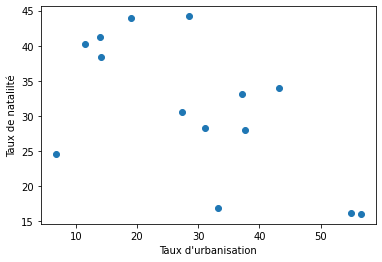

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data["Taux d'urbanisation"], data['Taux de natalilté'])
plt.xlabel("Taux d'urbanisation")
plt.ylabel('Taux de natalilté')